# Tropics map showing the regions for the obs paper climatology

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [2]:
save_dir = "/home/b/b380887/cold-point-overshoot/plots/obs_paper/climo/"


In [3]:
# setup

textsize = 30
numsize = 20

lw = 8
msize = 12

stamen_terrain = cimgt.Stamen('terrain-background')


In [4]:
ecp_coords = [-150, -100, 0, 15]
wpc_coords = [130, 180, 0, 15]
afr_coords = [-7, 35, 0, 18]
ioe_coords = [53, 95, -12, 6]
amz_coords = [-72, -47, -30, 0]
spc_coords = [165, -145, -20, -5]
ios_coords = [50, 100, -15, 0]

djf_coords_list = [amz_coords, spc_coords, ios_coords, ecp_coords]
width_list_djf = [25, 50, 50, 50]
height_list_djf = [30, 15, 15, 15]

jja_coords_list = [afr_coords, wpc_coords, ioe_coords, ecp_coords]
width_list_jja = [42, 50, 42, 50]
height_list_jja = [18, 15, 18, 15]


#### One figure/panel with both seasons together:

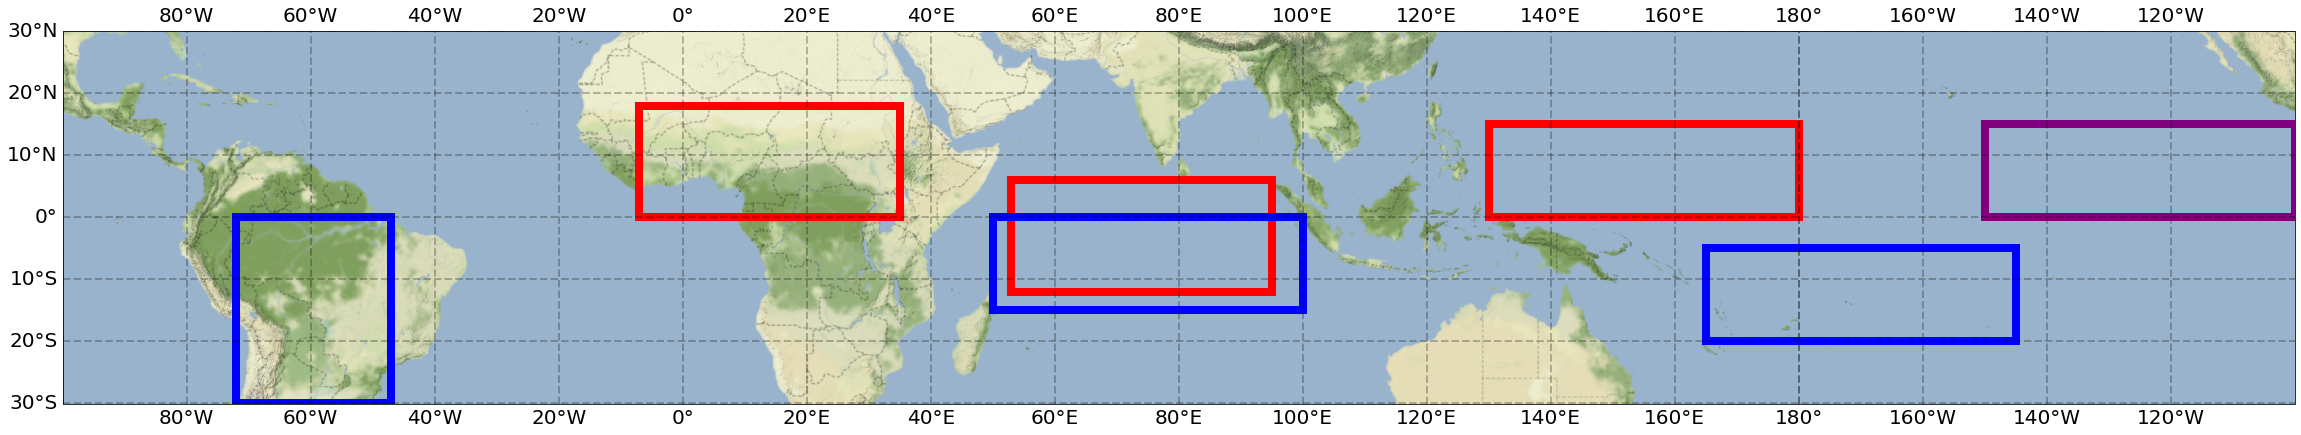

In [27]:
fig = plt.figure(figsize=(40, 10))

projection = ccrs.PlateCarree(central_longitude=80)
ax = plt.axes(projection=projection)
ax.add_image(stamen_terrain, 4)
ax.set_extent([-179.99, 180, -30.1, 30.1], crs=projection)


# gridlines and axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.25, linestyle='--',
                  xlocs=np.arange(-180, 181, step=20), ylocs=np.arange(-30, 31, step=10))
gl.xlabel_style = {'size': numsize}
gl.ylabel_style = {'size': numsize}

for i, coords in enumerate(jja_coords_list[:-1]):
    ax.add_patch(mpatches.Rectangle(xy=[coords[0], coords[2]], 
                                    width=width_list_jja[i], 
                                    height=height_list_jja[i],
                                    fill=False, color='red', linewidth=lw,
                                    transform=ccrs.PlateCarree()
                                   ))
    
for i, coords in enumerate(djf_coords_list[:-1]):
    ax.add_patch(mpatches.Rectangle(xy=[coords[0], coords[2]], 
                                    width=width_list_djf[i], 
                                    height=height_list_djf[i],
                                    fill=False, color='blue', linewidth=lw,
                                    transform=ccrs.PlateCarree()
                                   ))
    
ax.add_patch(mpatches.Rectangle(xy=[djf_coords_list[-1][0], djf_coords_list[-1][2]], 
                                width=width_list_djf[-1], 
                                height=height_list_djf[-1],
                                fill=False, color='purple', linewidth=lw,
                                transform=ccrs.PlateCarree()
                               ))

# save 
plt.savefig(save_dir + 'tropics_map_JJA_DJF_30S-30N_regions_80E_center.png', dpi=300, bbox_inches='tight')

plt.show()


#### One figure with each panel separate:

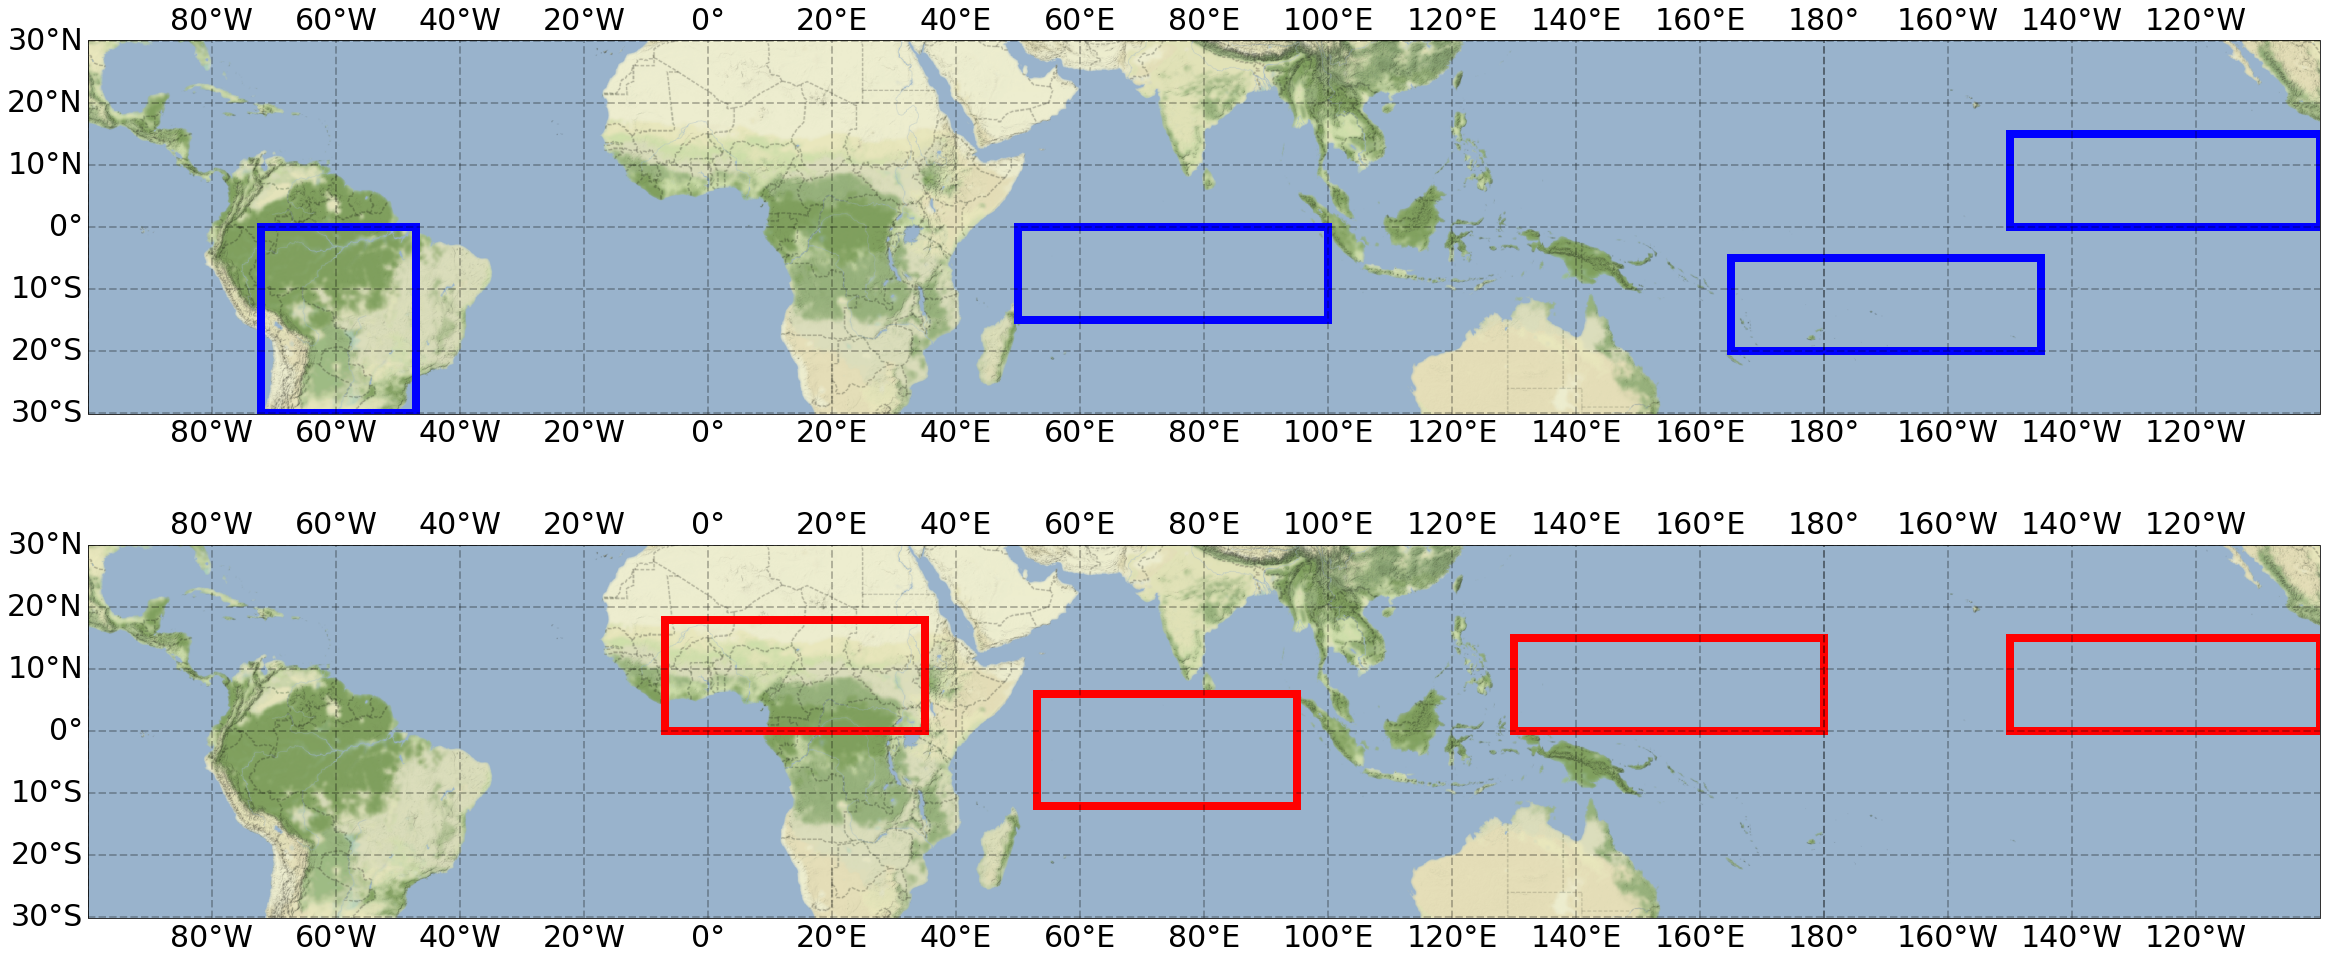

In [16]:
projection = ccrs.PlateCarree(central_longitude=80)
fig, axes = plt.subplots(2, 1, figsize=(40, 17), subplot_kw={'projection': projection})

numsize = 30

for ax in axes:
    ax.add_image(stamen_terrain, 4)
    ax.set_extent([-179.99, 180, -30.1, 30.1], crs=projection)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='k', alpha=0.25, linestyle='--',
                      xlocs=np.arange(-180, 181, step=20), ylocs=np.arange(-30, 31, step=10))
    gl.xlabel_style = {'size': numsize}
    gl.ylabel_style = {'size': numsize}


for i, coords in enumerate(jja_coords_list):
    axes[1].add_patch(mpatches.Rectangle(xy=[coords[0], coords[2]], 
                                         width=width_list_jja[i], 
                                         height=height_list_jja[i],
                                         fill=False, color='red', linewidth=lw,
                                         transform=ccrs.PlateCarree()
                                        ))
    
for i, coords in enumerate(djf_coords_list):
    axes[0].add_patch(mpatches.Rectangle(xy=[coords[0], coords[2]], 
                                         width=width_list_djf[i], 
                                         height=height_list_djf[i],
                                         fill=False, color='blue', linewidth=lw,
                                         transform=ccrs.PlateCarree()
                                        ))

# save 
plt.savefig(save_dir + 'tropics_map_JJA_DJF_sep_panels_30S-30N_regions_80E_center.png', dpi=300, bbox_inches='tight')

plt.show()
